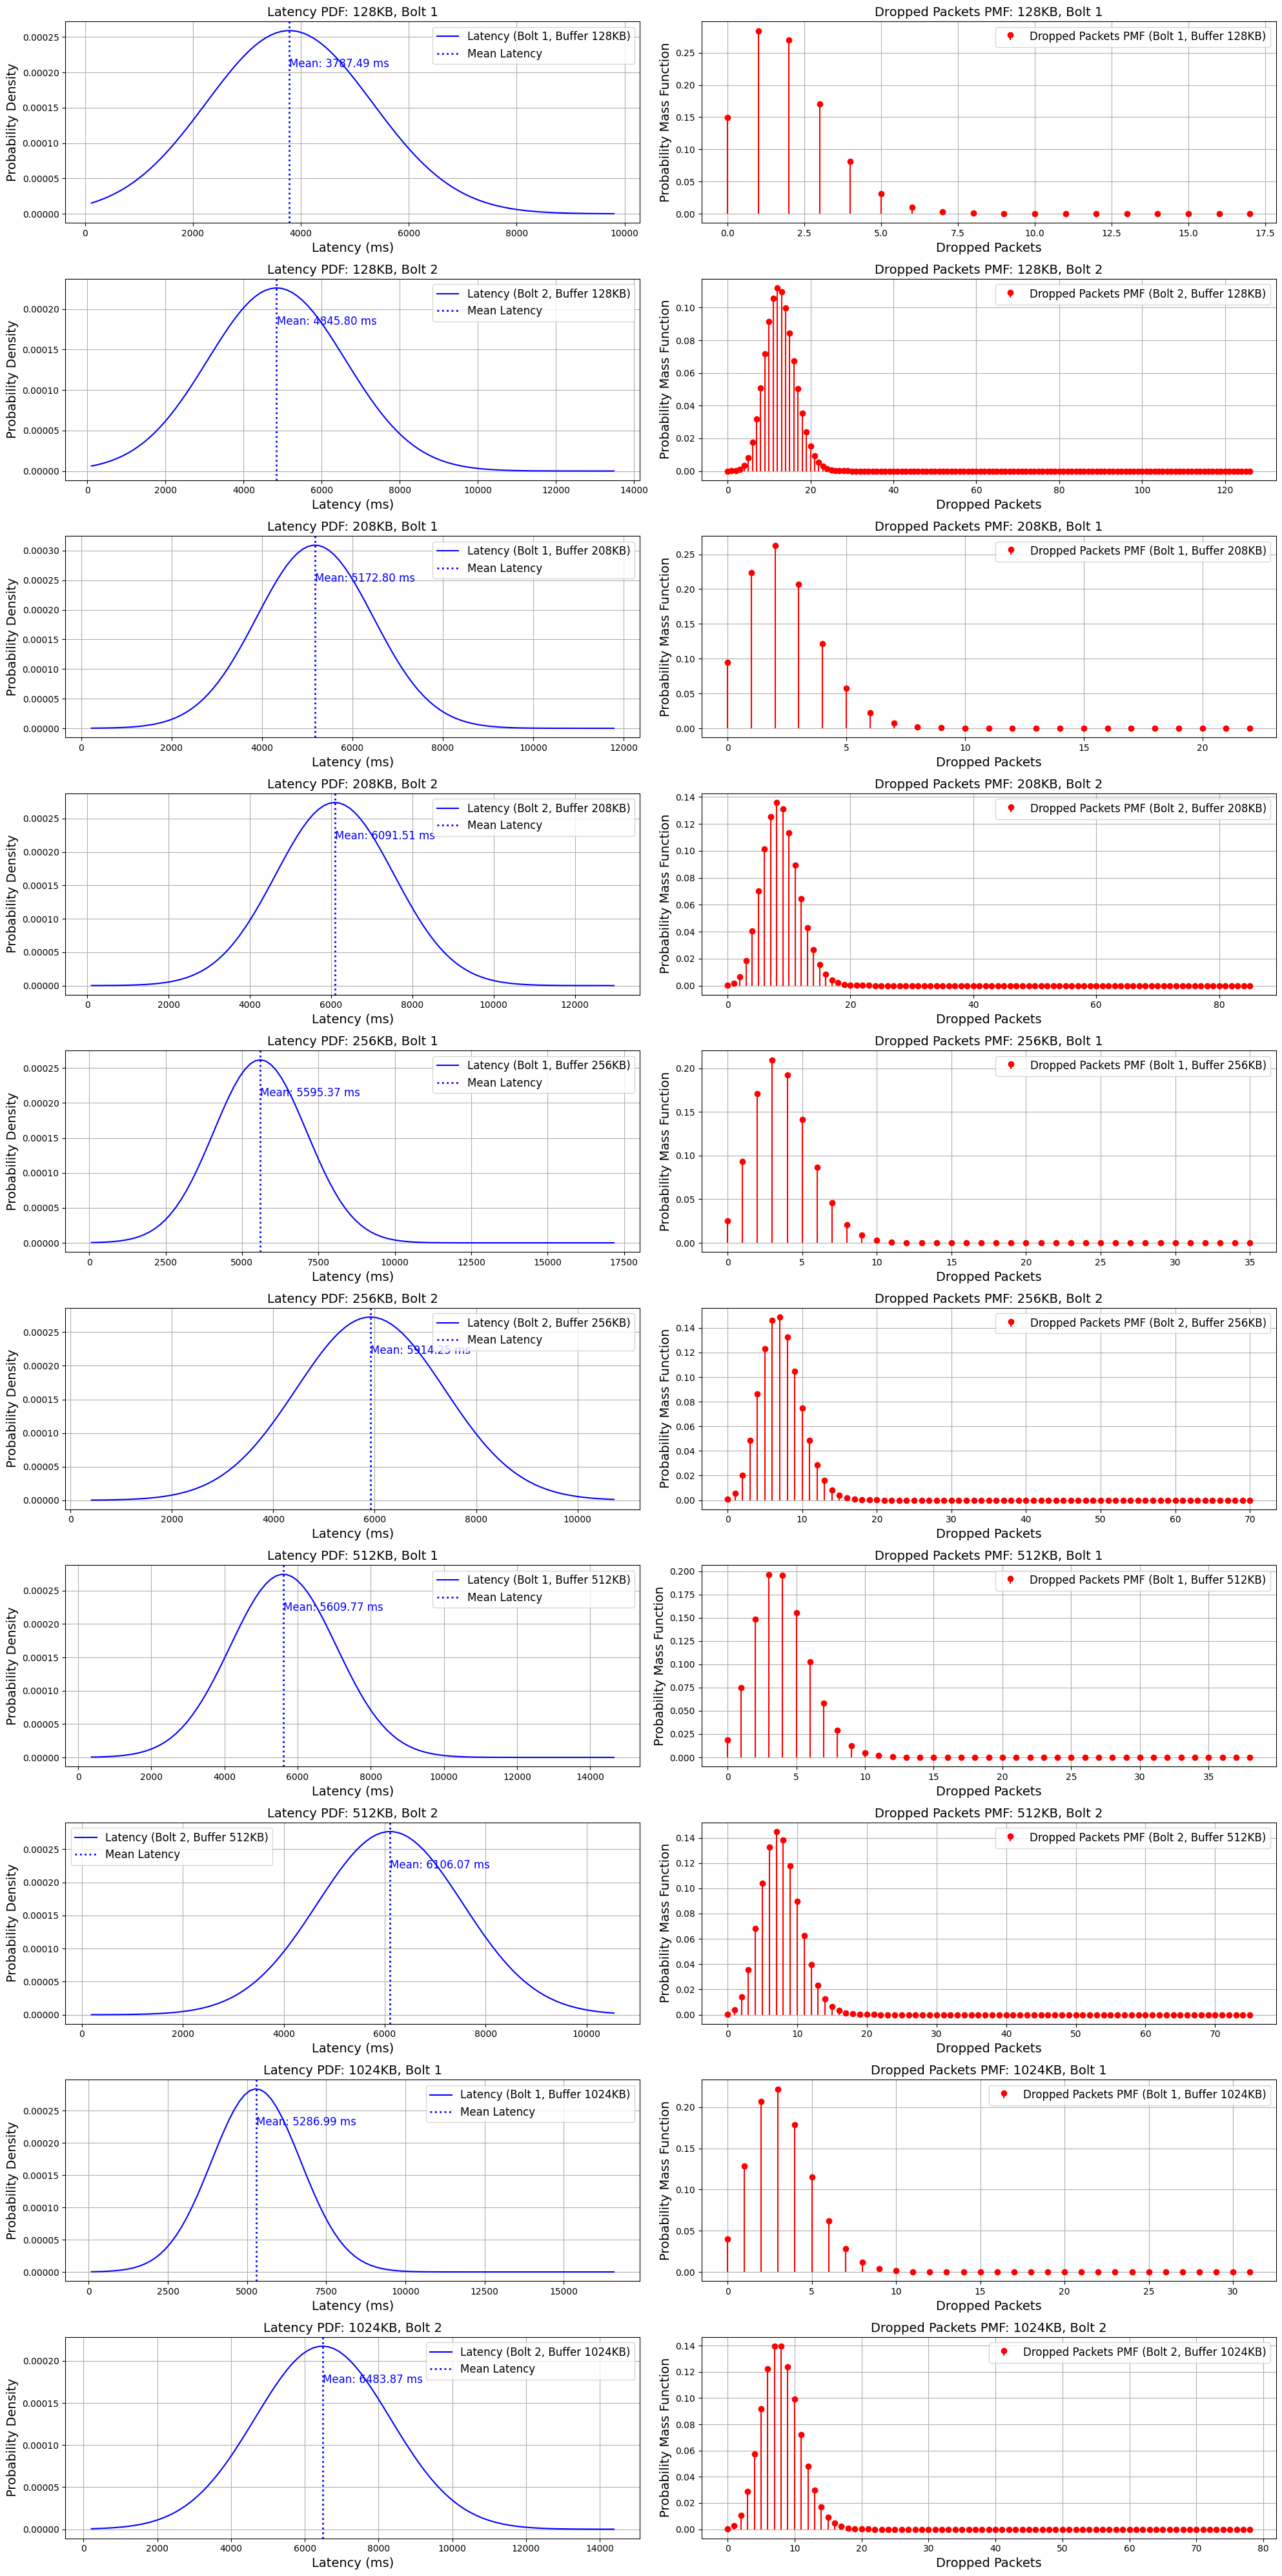

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# List of file names with full paths
file_names = [
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_1024KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_1024KB.csv'
]

# Plotting
plt.figure(figsize=(20, 40))  # Increase figure size for readability
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots

plot_index = 1

# Iterate over the files
for file in file_names:
    # Load the dataset
    data = pd.read_csv(file)

    # Extract buffer size and bolt label from the file name
    buffer_size = int(file.split('_')[-1].replace('KB.csv', ''))
    bolt_label = "Bolt 1" if "b1" in file else "Bolt 2" if "b2" in file else "Unknown Bolt"

    # Filter data for the current buffer size
    filtered_data = data[data['Buffer Size(KB)'] == buffer_size]

    # Fit the distributions for continuous variable (Latency)
    latency_params = stats.norm.fit(filtered_data['Latency (ms)'])
    latency_mean = latency_params[0]  # Extract mean from fit parameters

    # For Dropped Packets, calculate the mean and use it for Poisson distribution (Discrete)
    lambda_drop = np.mean(filtered_data['Dropped Packets'])

    # Generate a range for PDFs for Latency (Continuous Distributions)
    latency_range = np.linspace(filtered_data['Latency (ms)'].min(), filtered_data['Latency (ms)'].max(), 100)

    # Calculate the PDF for Latency
    latency_pdf = stats.norm.pdf(latency_range, *latency_params)

    # Generate a range for PMF of Dropped Packets
    drop_range = np.arange(0, int(lambda_drop * 10))  # Adjust based on observed max values
    drop_pmf = stats.poisson.pmf(drop_range, lambda_drop)

    # Plotting for each file (Buffer size and Bolt label)
    # Latency PDF
    plt.subplot(10, 2, plot_index)
    plt.plot(latency_range, latency_pdf, label=f"Latency ({bolt_label}, Buffer {buffer_size}KB)", color="blue")
    plt.axvline(latency_mean, color='blue', linestyle='dotted', linewidth=2, label="Mean Latency")  # Add dotted line at mean
    plt.text(latency_mean + 0.5, max(latency_pdf) * 0.8, f'Mean: {latency_mean:.2f} ms', color='blue', fontsize=12)  # Add mean value text
    plt.title(f"Latency PDF: {buffer_size}KB, {bolt_label}", fontsize=14)
    plt.xlabel("Latency (ms)", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Dropped Packets PMF
    plt.subplot(10, 2, plot_index + 1)
    plt.stem(drop_range, drop_pmf, label=f"Dropped Packets PMF ({bolt_label}, Buffer {buffer_size}KB)", linefmt="red", markerfmt="ro", basefmt=" ")
    plt.title(f"Dropped Packets PMF: {buffer_size}KB, {bolt_label}", fontsize=14)
    plt.xlabel("Dropped Packets", fontsize=14)
    plt.ylabel("Probability Mass Function", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plot_index += 2  # Move to the next set of subplots

plt.tight_layout()
plt.show()


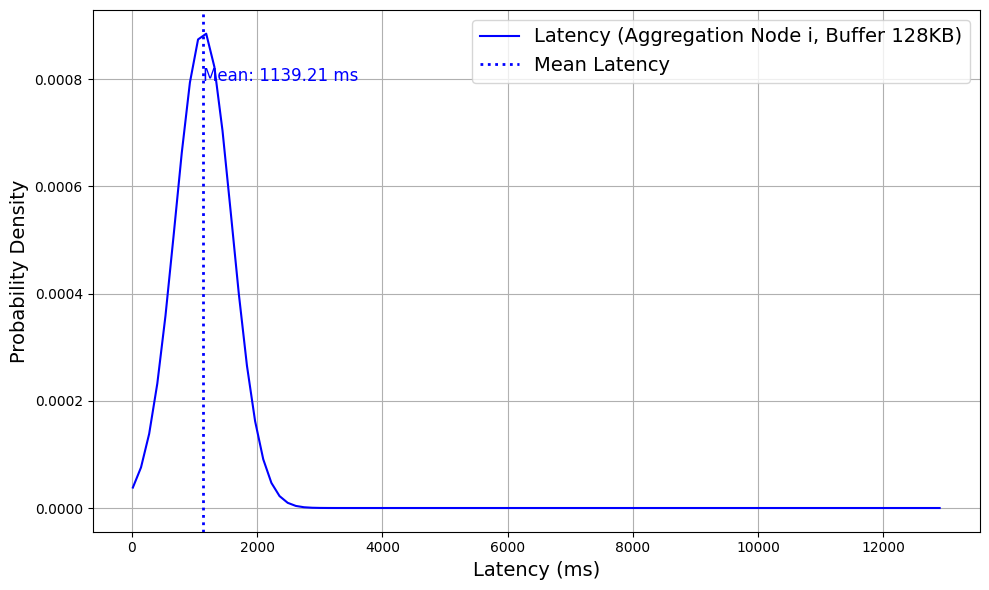

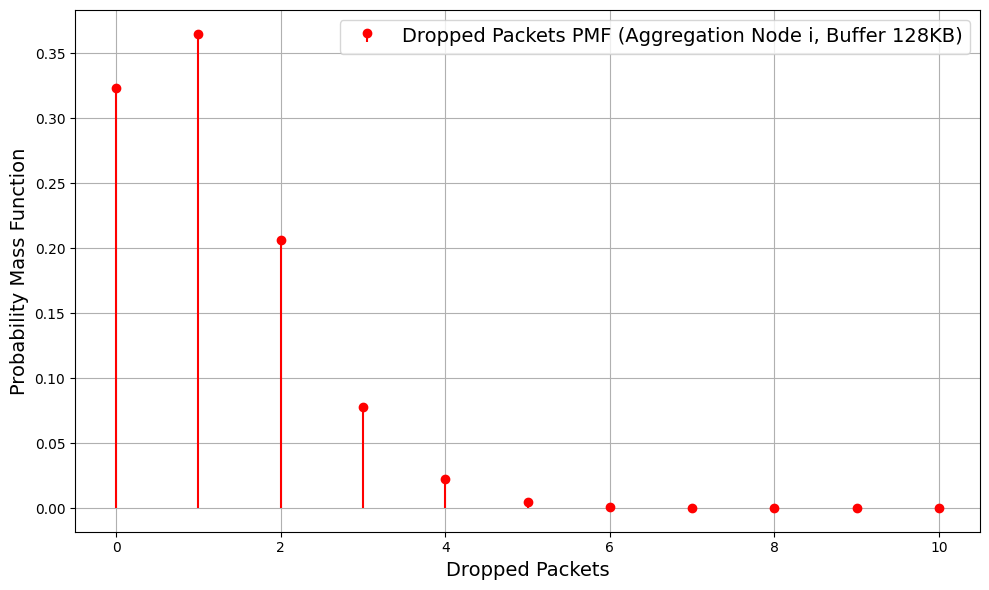

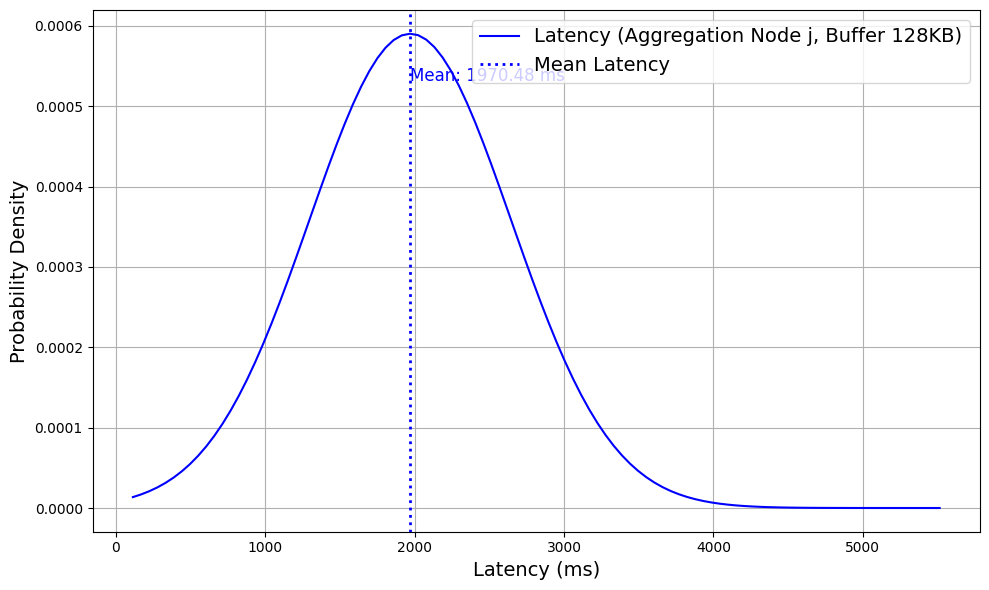

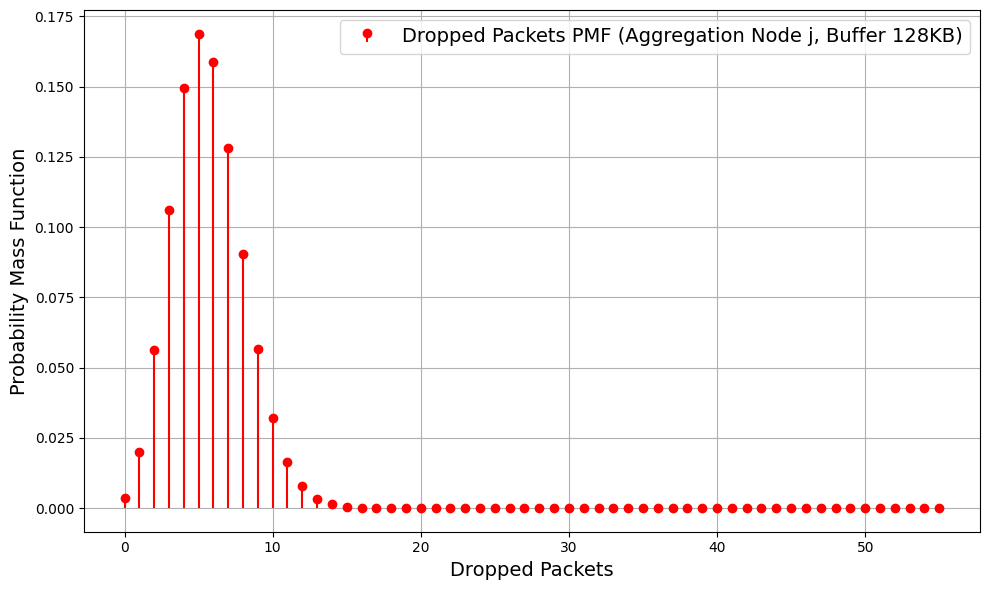

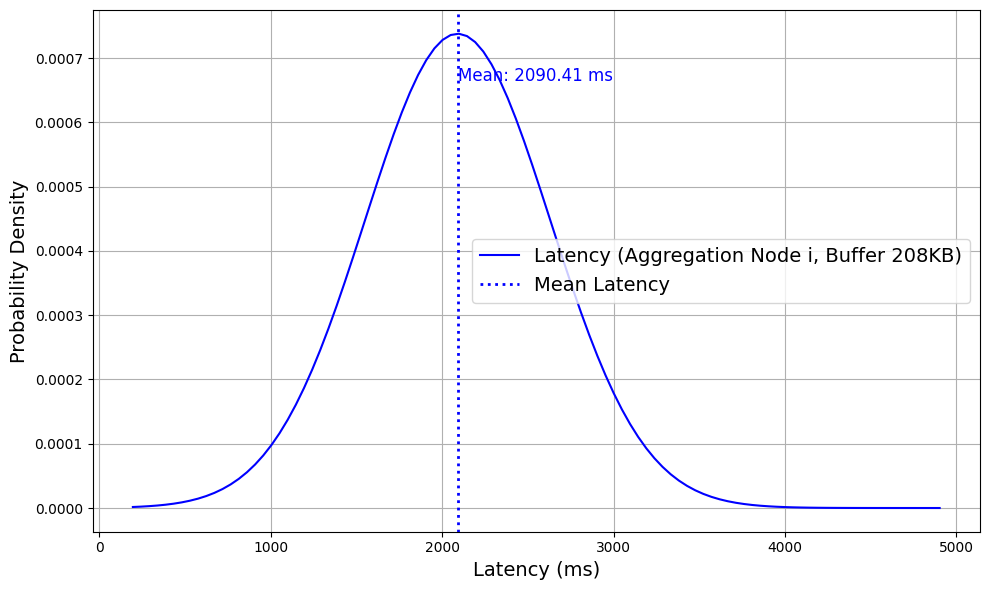

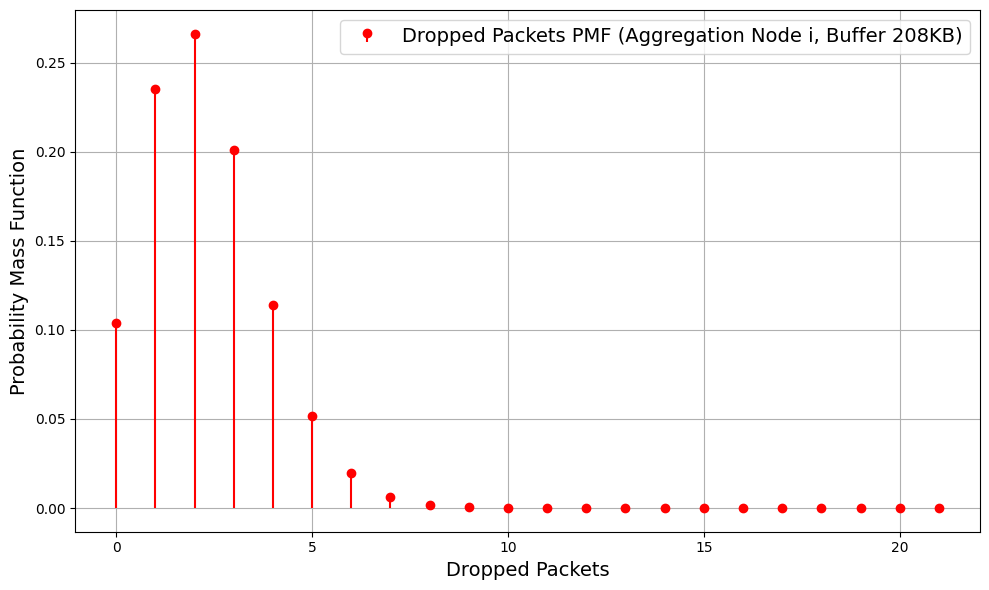

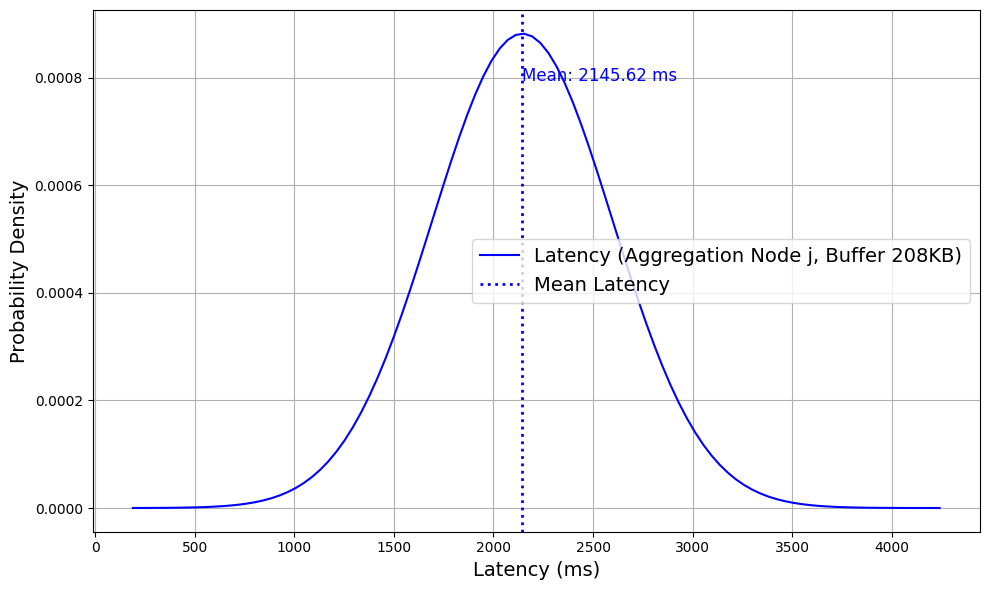

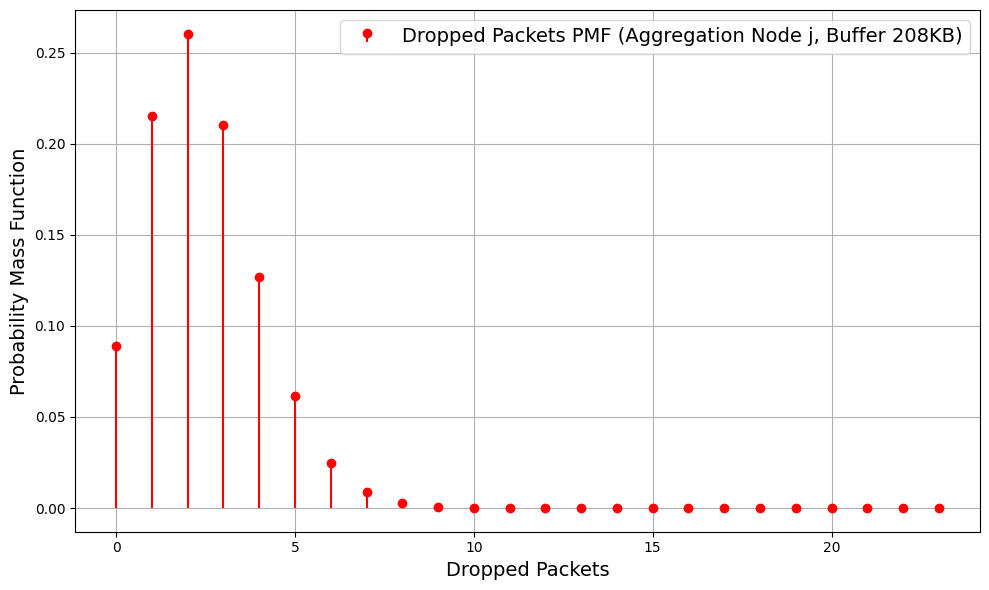

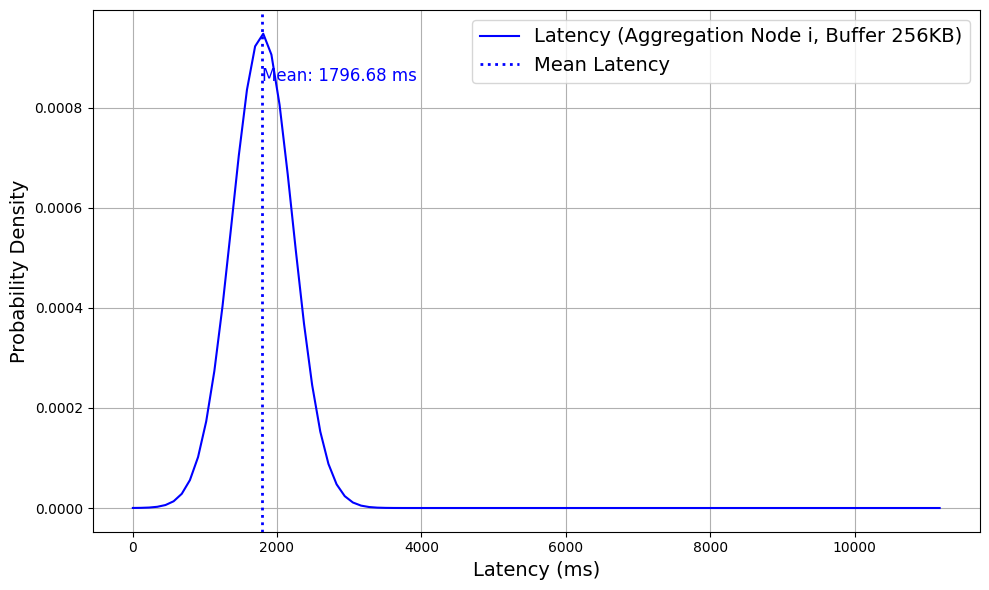

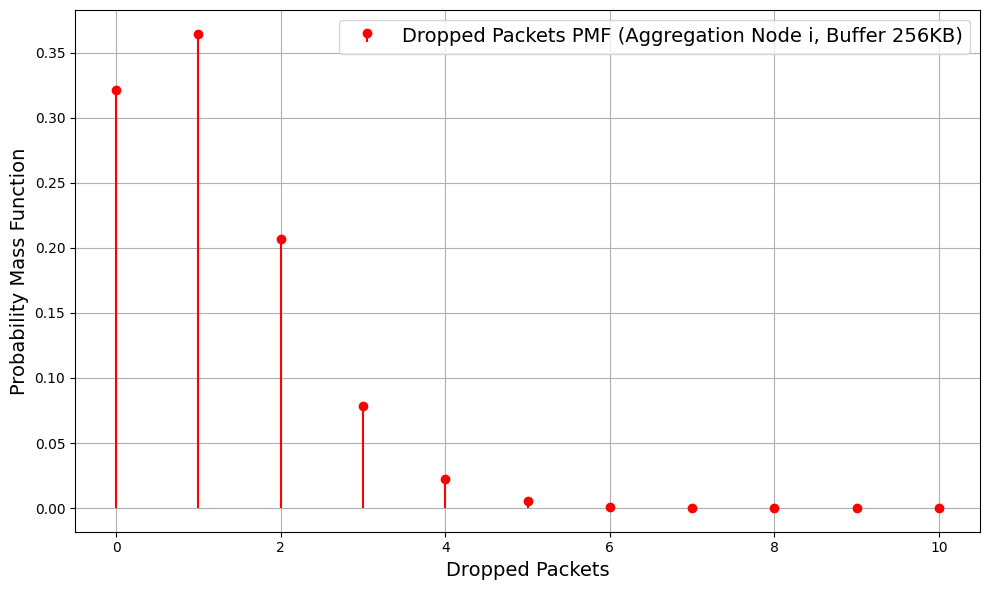

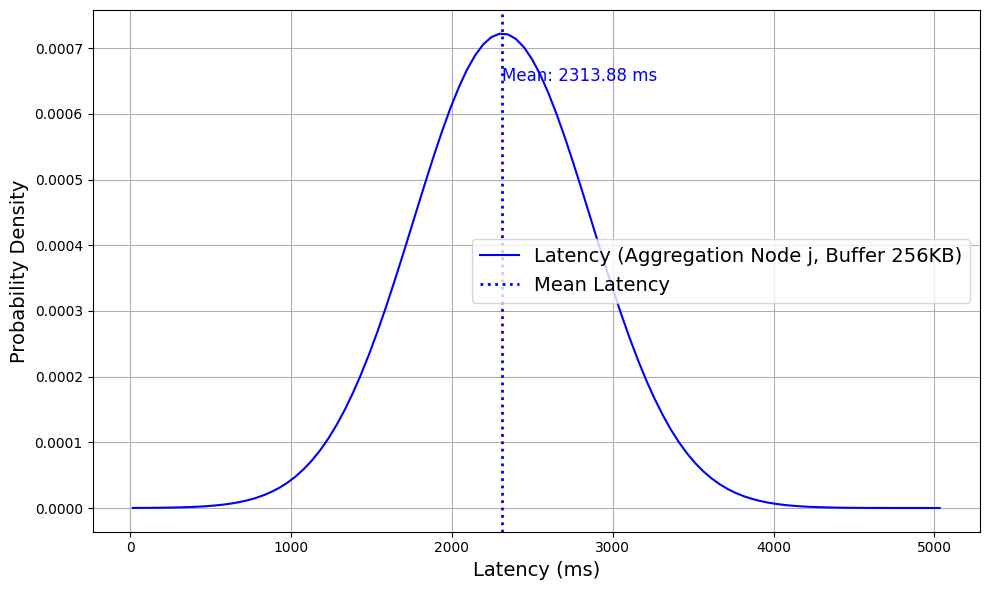

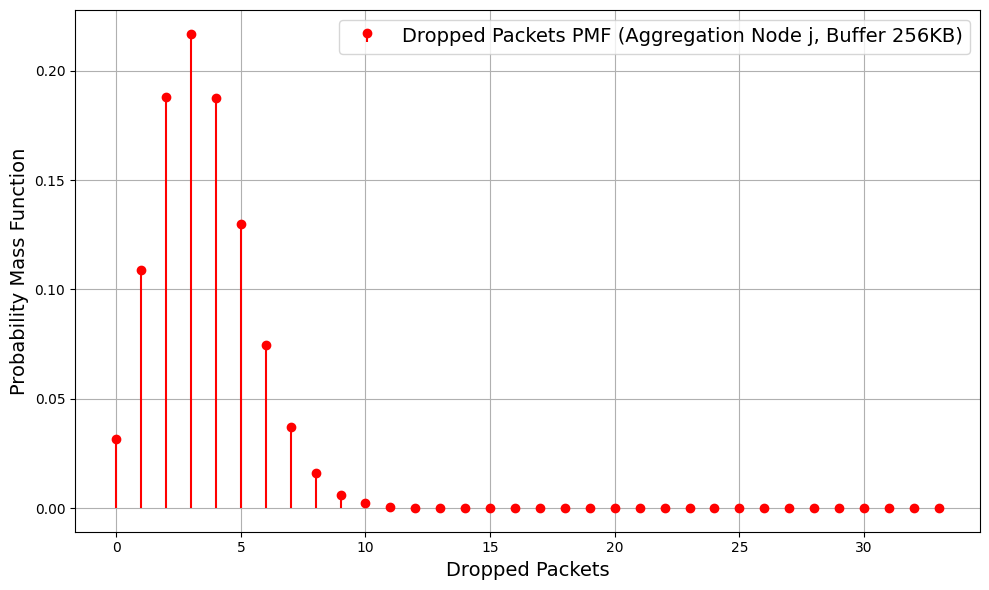

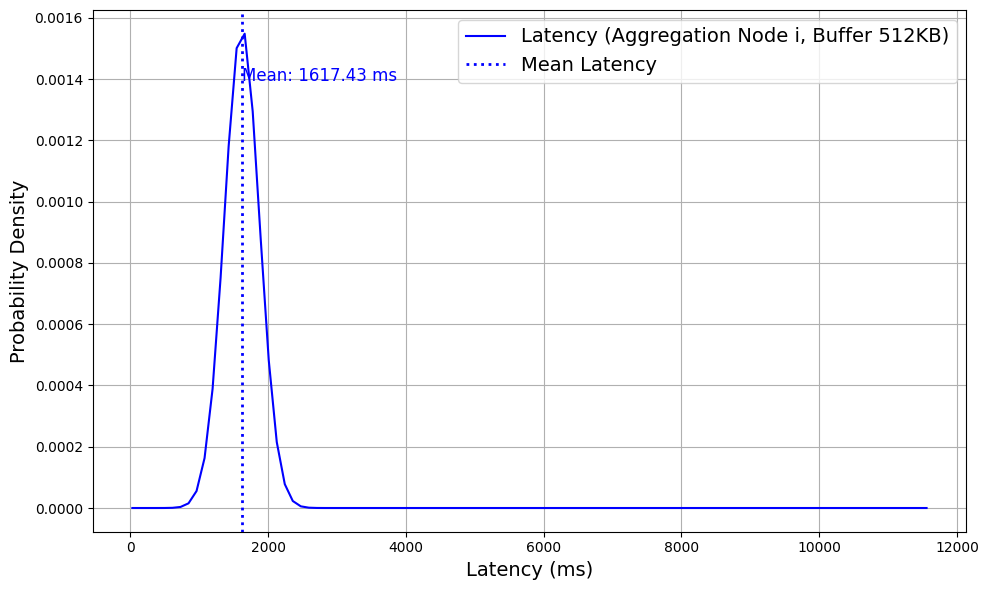

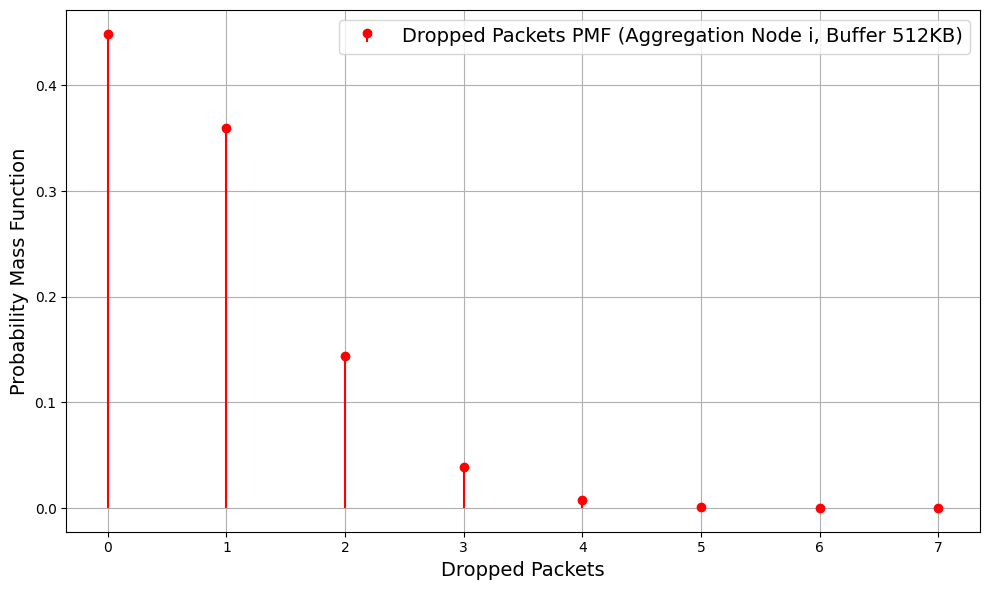

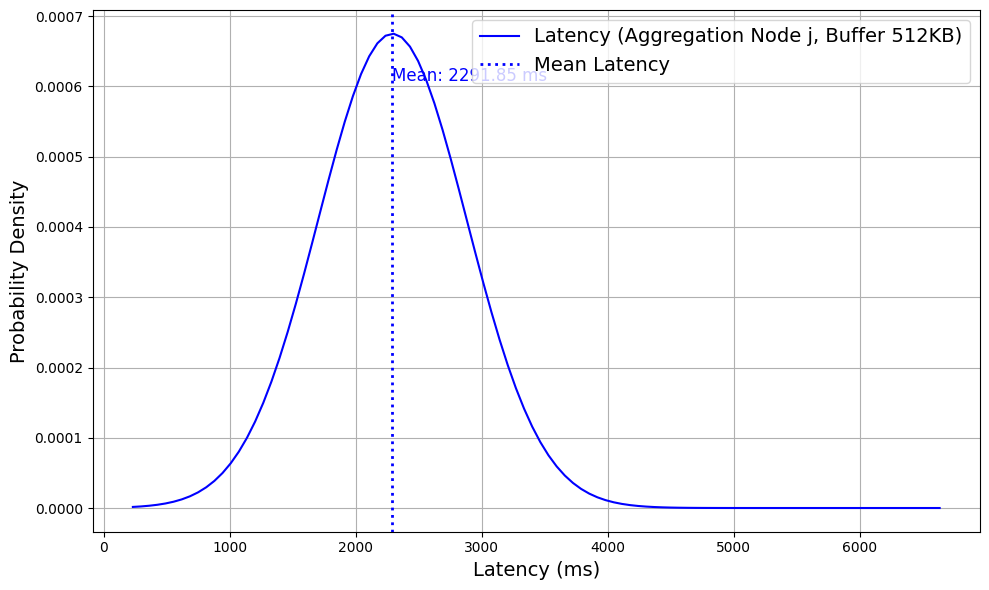

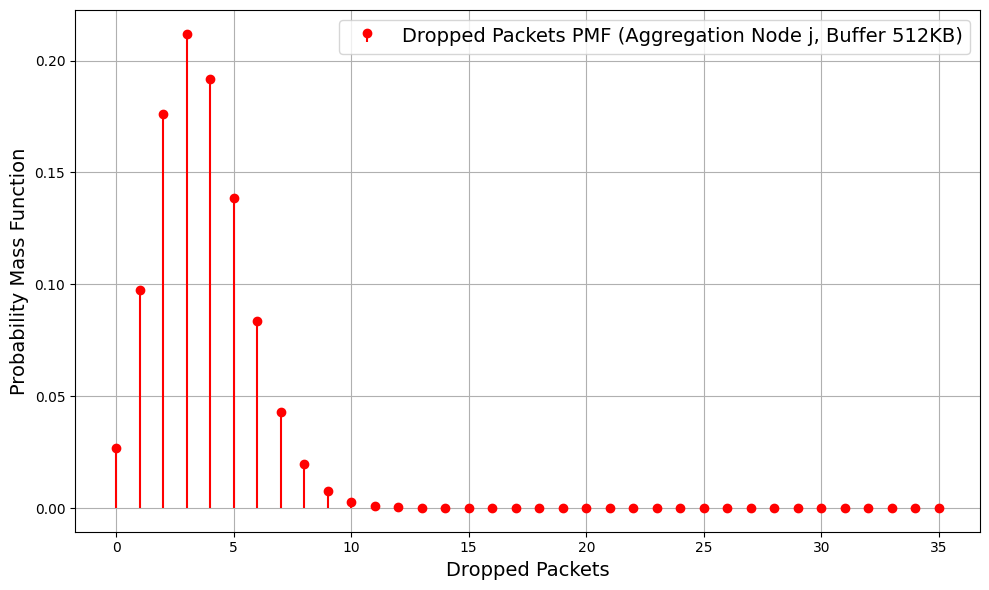

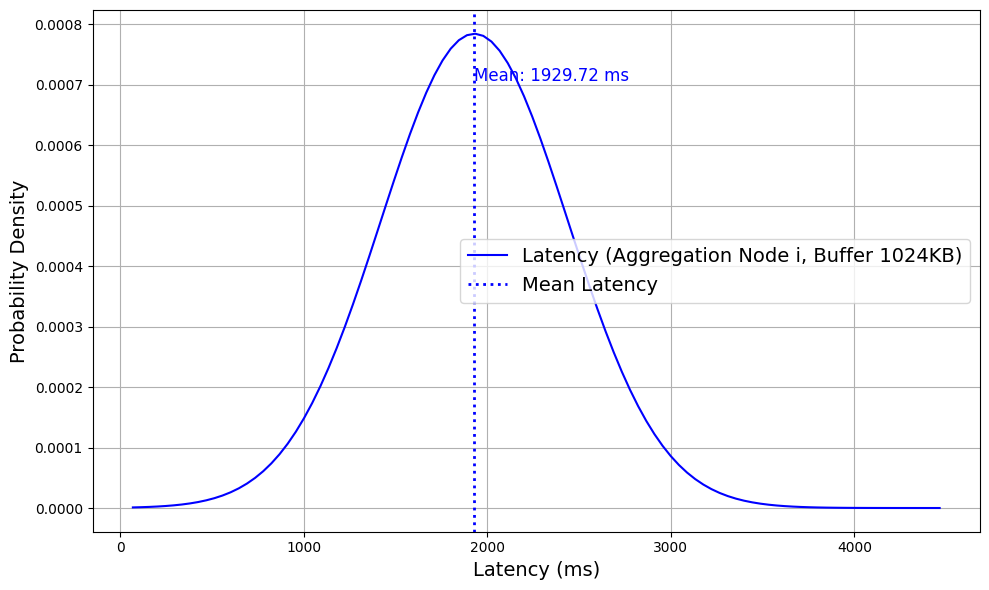

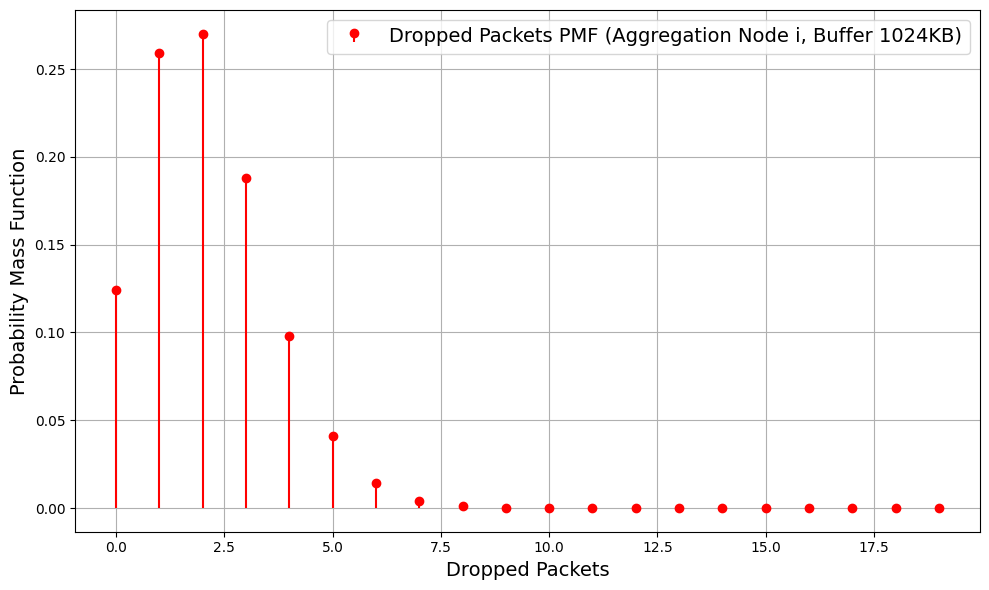

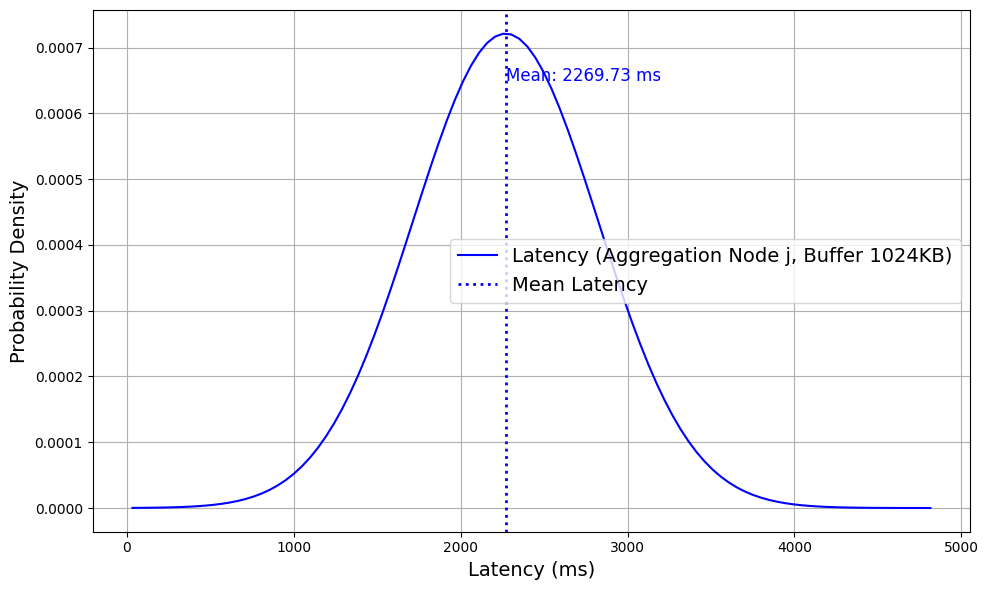

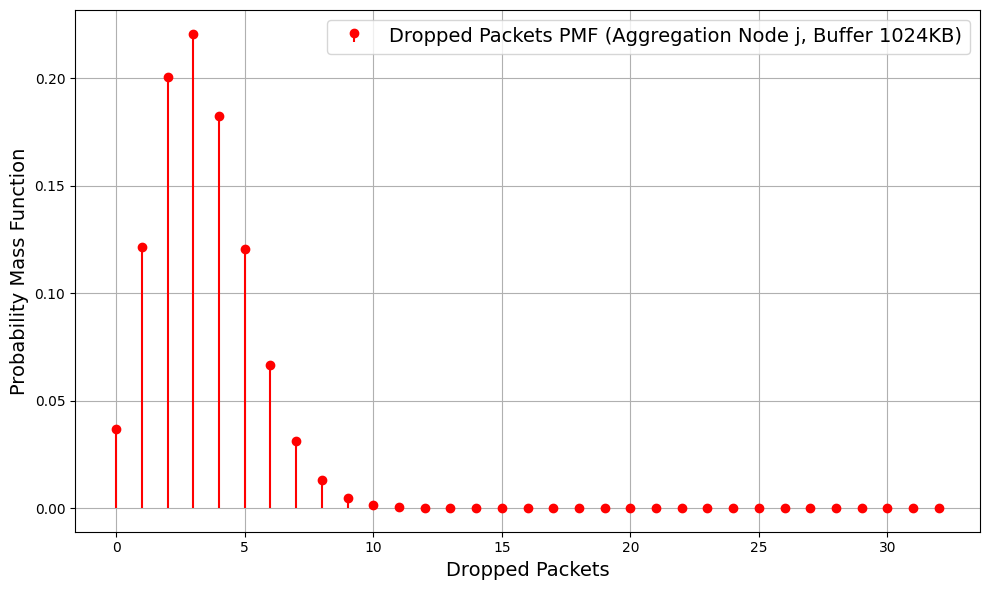

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# List of file names with full paths
file_names = [
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_1024KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_1024KB.csv'
]

# Iterate over the files
for file in file_names:
    # Load the dataset
    data = pd.read_csv(file)

    # Extract buffer size and bolt label from the file name
    buffer_size = int(file.split('_')[-1].replace('KB.csv', ''))
    bolt_label = "Aggregation Node i" if "b1" in file else "Aggregation Node j" if "b2" in file else "Unknown Bolt"

    # Filter data for the current buffer size
    filtered_data = data[data['Buffer Size(KB)'] == buffer_size]

    # Fit the distributions for continuous variable (Latency)
    latency_params = stats.norm.fit(filtered_data['Latency (ms)'])
    latency_mean = latency_params[0]  # Extract mean from fit parameters

    # For Dropped Packets, calculate the mean and use it for Poisson distribution (Discrete)
    lambda_drop = np.mean(filtered_data['Dropped Packets'])

    # Generate a range for PDFs for Latency (Continuous Distributions)
    latency_range = np.linspace(filtered_data['Latency (ms)'].min(), filtered_data['Latency (ms)'].max(), 100)

    # Calculate the PDF for Latency
    latency_pdf = stats.norm.pdf(latency_range, *latency_params)

    # Generate a range for PMF of Dropped Packets
    drop_range = np.arange(0, int(lambda_drop * 10))  # Adjust based on observed max values
    drop_pmf = stats.poisson.pmf(drop_range, lambda_drop)

    # Create a new figure for Latency PDF
    plt.figure(figsize=(10, 6))  # Set the figure size for Latency PDF
    plt.plot(latency_range, latency_pdf, label=f"Latency ({bolt_label}, Buffer {buffer_size}KB)", color="blue")
    plt.axvline(latency_mean, color='blue', linestyle='dotted', linewidth=2, label="Mean Latency")  # Add dotted line at mean
    plt.text(latency_mean, max(latency_pdf) * 0.9, f"Mean: {latency_mean:.2f} ms", color='blue', fontsize=12)  # Display the mean value
    #plt.title(f"Latency PDF: {buffer_size}KB, {bolt_label}", fontsize=14)
    plt.xlabel("Latency (ms)", fontsize=14)
    plt.ylabel("Probability Density", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()  # Display the current figure for Latency PDF

    # Create a new figure for Dropped Packets PMF
    plt.figure(figsize=(10, 6))  # Set the figure size for Dropped Packets PMF
    plt.stem(drop_range, drop_pmf, label=f"Dropped Packets PMF ({bolt_label}, Buffer {buffer_size}KB)", linefmt="red", markerfmt="ro", basefmt=" ")
    #plt.title(f"Dropped Packets PMF: {buffer_size}KB, {bolt_label}", fontsize=14)
    plt.xlabel("Dropped Packets", fontsize=14)
    plt.ylabel("Probability Mass Function", fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()  # Display the current figure for Dropped Packets PMF


No latency data for buffer size 512KB at rate 0.002


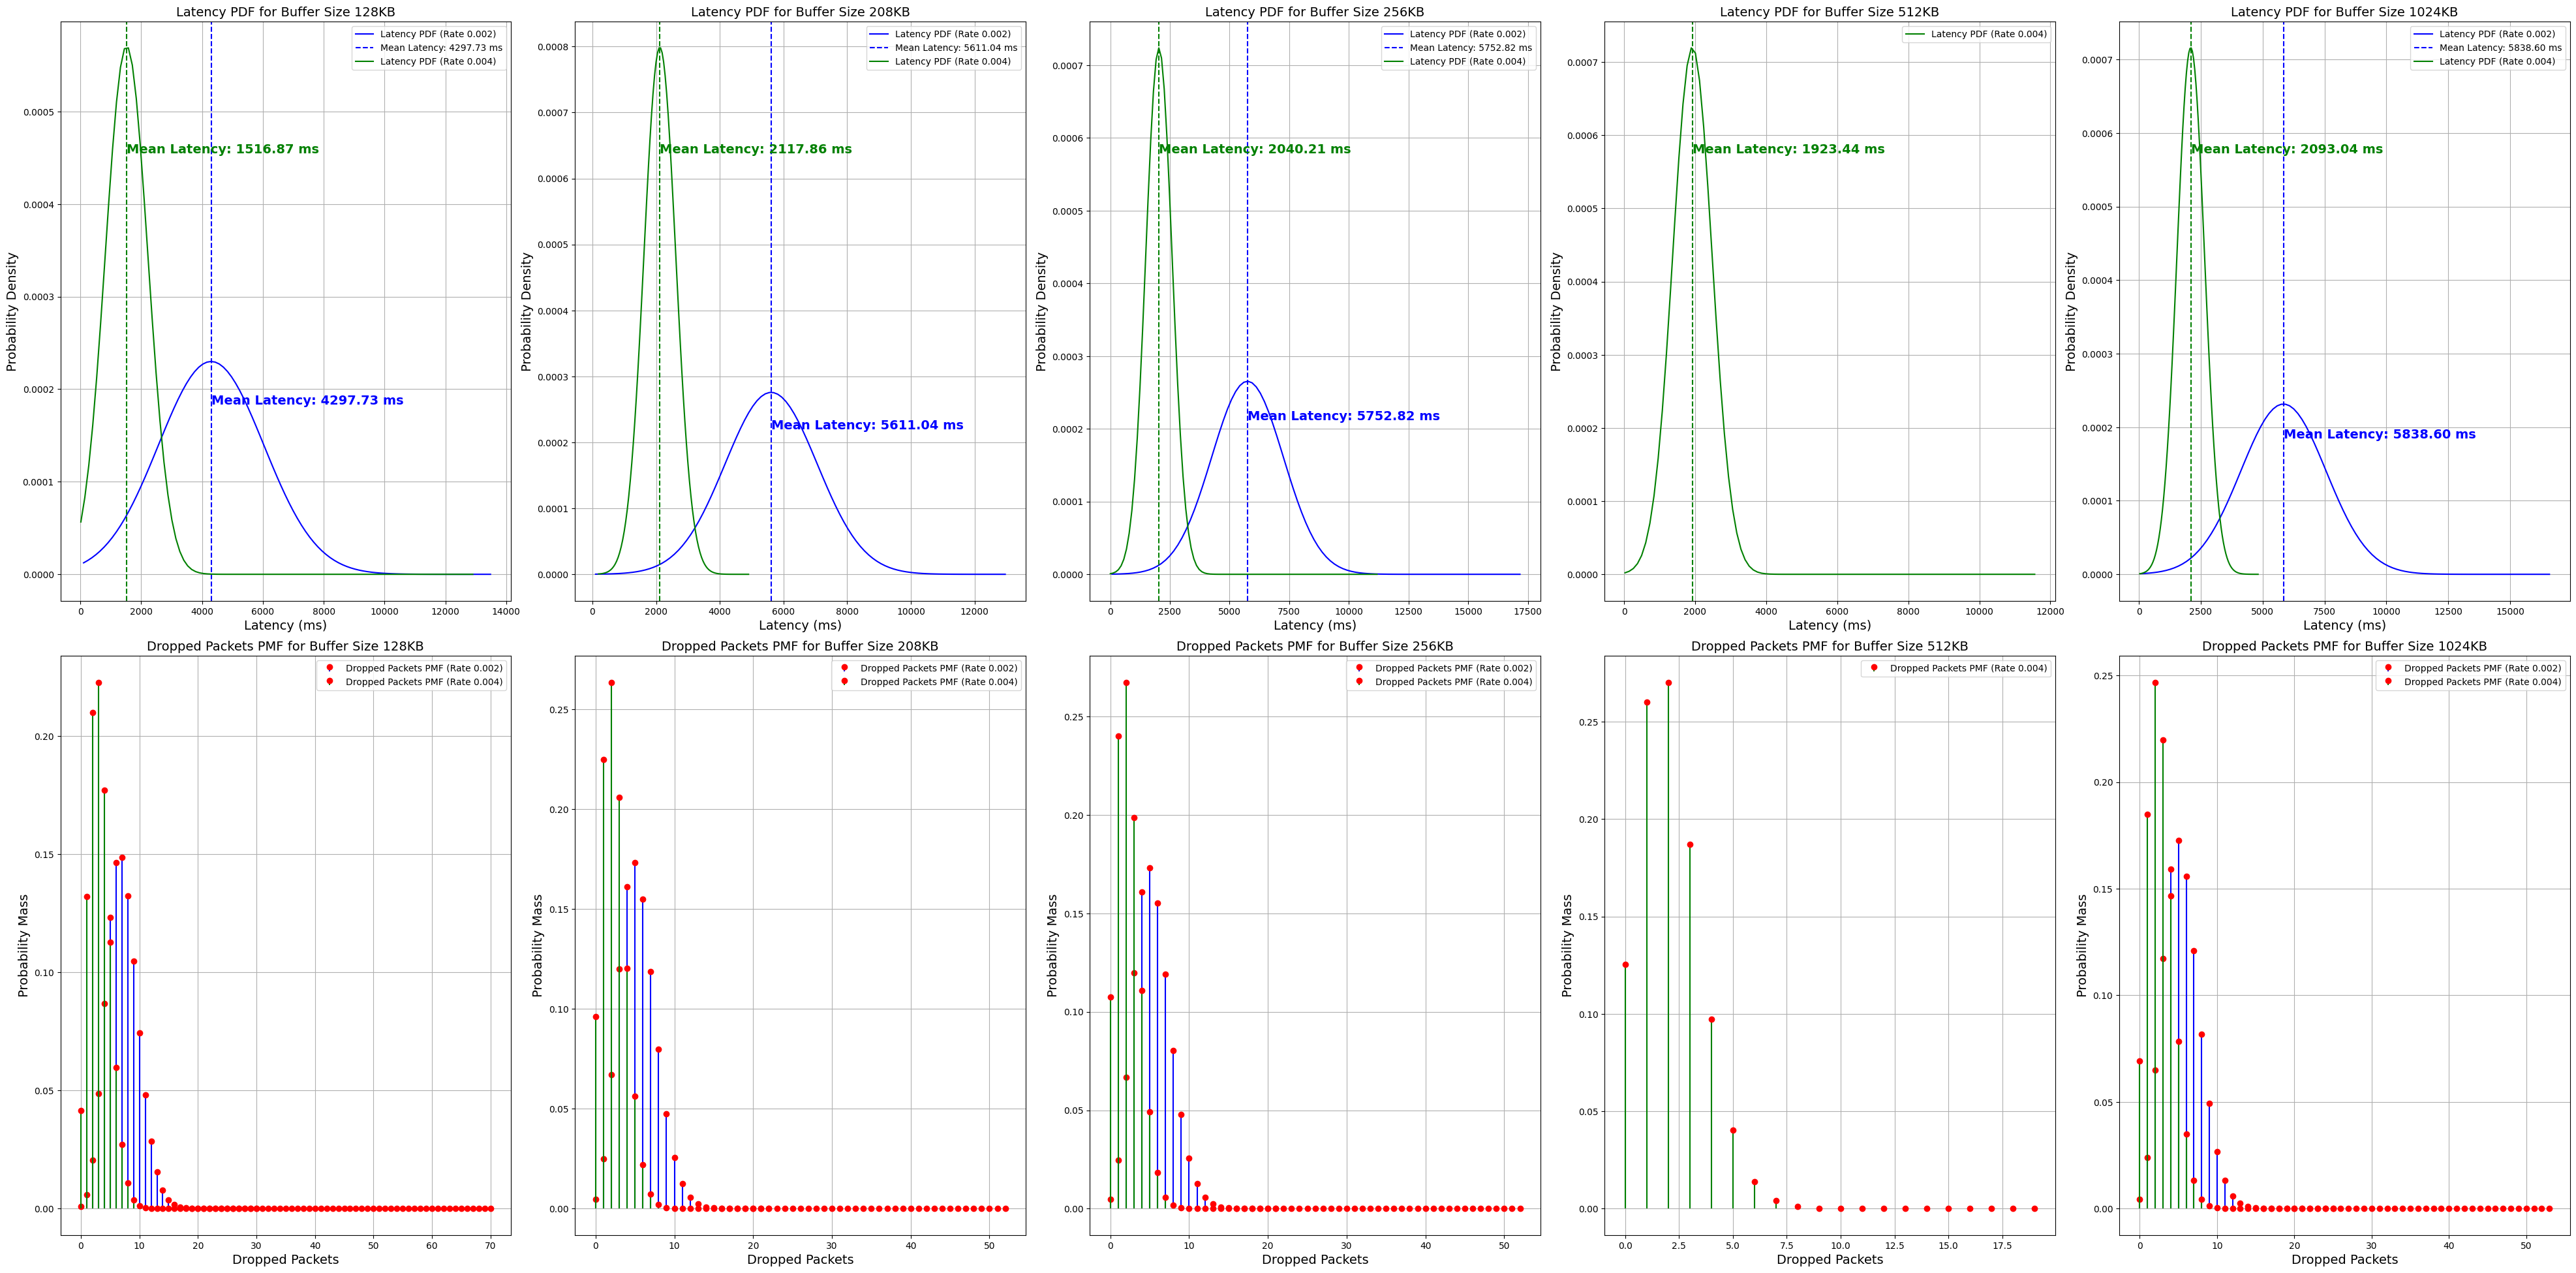

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# File names for both input rates
file_names_002 = [
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_1024KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_1024KB.csv'
]

file_names_004 = [
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_1024KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_1024KB.csv'
]

# List of buffer sizes to consider
buffer_sizes = [128, 208, 256, 512, 1024]

# Create a figure with subplots (1 row, 2 columns)
fig, axs = plt.subplots(2, len(buffer_sizes), figsize=(40, 20))
fig.tight_layout(pad=4.0)  # Adjust space between plots

# Function to plot Latency PDF and Dropped Packets PMF for one input rate
def plot_data(file_names, rate_label, color, selected_buffer_size, latency_ax, drop_ax):
    latency_data = []
    drop_data = []

    # Read data from each file and collect latency and dropped packets data
    for file in file_names:
        data = pd.read_csv(file)

        # Extract buffer size and bolt label from the file name
        buffer_size = int(file.split('_')[-1].replace('KB.csv', ''))
        bolt_label = "Bolt 1" if "b1" in file else "Bolt 2" if "b2" in file else "Unknown Bolt"

        # Only process data for the selected buffer size
        if buffer_size == selected_buffer_size:
            # Filter data for the selected buffer size
            filtered_data = data[data['Buffer Size(KB)'] == buffer_size]

            # Collect Latency data
            latency_data.extend(filtered_data['Latency (ms)'].values)

            # Collect Dropped Packets data
            drop_data.extend(filtered_data['Dropped Packets'].values)

    # Check if data is empty
    if len(latency_data) == 0:
        print(f"No latency data for buffer size {selected_buffer_size}KB at rate {rate_label}")
        return

    # Fit the Latency data to a Normal distribution
    latency_params = stats.norm.fit(latency_data)
    latency_range = np.linspace(min(latency_data), max(latency_data), 100)
    latency_pdf = stats.norm.pdf(latency_range, *latency_params)

    # Fit the Dropped Packets data to a Poisson distribution
    lambda_drop = np.mean(drop_data)
    drop_range = np.arange(0, int(lambda_drop * 10))
    drop_pmf = stats.poisson.pmf(drop_range, lambda_drop)

    # Plot the Latency PDF on the latency axis
    latency_ax.plot(latency_range, latency_pdf, label=f"Latency PDF (Rate {rate_label})", color=color)
    latency_ax.set_title(f"Latency PDF for Buffer Size {selected_buffer_size}KB", fontsize=14)
    latency_ax.set_xlabel("Latency (ms)", fontsize=14)
    latency_ax.set_ylabel("Probability Density", fontsize=14)
    latency_ax.legend()
    latency_ax.grid(True)

# Add vertical line for mean latency
    mean_latency = latency_params[0]
    latency_ax.axvline(mean_latency, color=color, linestyle='--', label=f'Mean Latency: {mean_latency:.2f} ms')

# Calculate the position for annotation dynamically
    x_position = mean_latency
    y_position = max(latency_pdf) * 0.8  # 80% of the maximum y value to avoid overlap

# Annotate the mean value on the plot
    latency_ax.annotate(f'Mean Latency: {mean_latency:.2f} ms',
                    xy=(x_position, y_position),
                    xycoords='data',
                    fontsize=14, color=color, weight='bold')

    # Plot the Dropped Packets PMF on the dropped packets axis
    drop_ax.stem(drop_range, drop_pmf, label=f"Dropped Packets PMF (Rate {rate_label})", linefmt=color, markerfmt="ro", basefmt=" ")
    drop_ax.set_title(f"Dropped Packets PMF for Buffer Size {selected_buffer_size}KB", fontsize=14)
    drop_ax.set_xlabel("Dropped Packets", fontsize=14)
    drop_ax.set_ylabel("Probability Mass", fontsize=14)
    drop_ax.legend()
    drop_ax.grid(True)

# Loop through each rate, buffer size, and plot the data
for i, buffer_size in enumerate(buffer_sizes):
    axs_lat = axs[0, i]
    axs_drop = axs[1, i]

    plot_data(file_names_002, "0.002", 'b', buffer_size, axs_lat, axs_drop)
    plot_data(file_names_004, "0.004", 'g', buffer_size, axs_lat, axs_drop)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import json
import glob

# File paths grouped by input rates and nodes (replace with your file paths)
file_groups = {
    '0.002': [
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_128KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_128KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_208KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_208KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_256KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_256KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_512KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_512KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_1024KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_1024KB.csv'
    ],
    '0.004': [
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_128KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_128KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_208KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_208KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_256KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_256KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_512KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_512KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b1_1024KB.csv',
        '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.004/packet_latency_log_b2_1024KB.csv'
    ]
}

# Loop over each file, compute PDF, and save results
pdf_storage = {}

for rate, files in file_groups.items():
    for file_path in files:
        # Extract buffer size and node from the filename
        buffer_size = file_path.split('_')[-1].replace('.csv', '')
        node = 'b1' if 'b1' in file_path else 'b2'

        # Load the CSV file
        data = pd.read_csv(file_path)

        # Assuming 'latency' and 'packet_drop' columns are in the CSV
        latency_data = data['Latency (ms)']
        packet_drop_data = data['Dropped Packets']

        # Compute PDFs using Kernel Density Estimation
        latency_kde = gaussian_kde(latency_data)
        packet_drop_kde = gaussian_kde(packet_drop_data)

        # Evaluate PDF over a range of values for both latency and packet drop
        latency_range = np.linspace(latency_data.min(), latency_data.max(), 1000)
        packet_drop_range = np.linspace(packet_drop_data.min(), packet_drop_data.max(), 1000)

        latency_pdf_values = latency_kde(latency_range)
        packet_drop_pdf_values = packet_drop_kde(packet_drop_range)

        # Store PDF data in a dictionary
        pdf_key = f"{rate}_{buffer_size}_{node}"
        pdf_storage[pdf_key] = {
            "Latency (ms)": {
                "x_values": latency_range.tolist(),
                "pdf_values": latency_pdf_values.tolist()
            },
            "Dropped Packets": {
                "x_values": packet_drop_range.tolist(),
                "pdf_values": packet_drop_pdf_values.tolist()
            }
        }

# Save the PDF storage dictionary to a JSON file for later sampling
with open("pdf_storage.json", "w") as json_file:
    json.dump(pdf_storage, json_file)

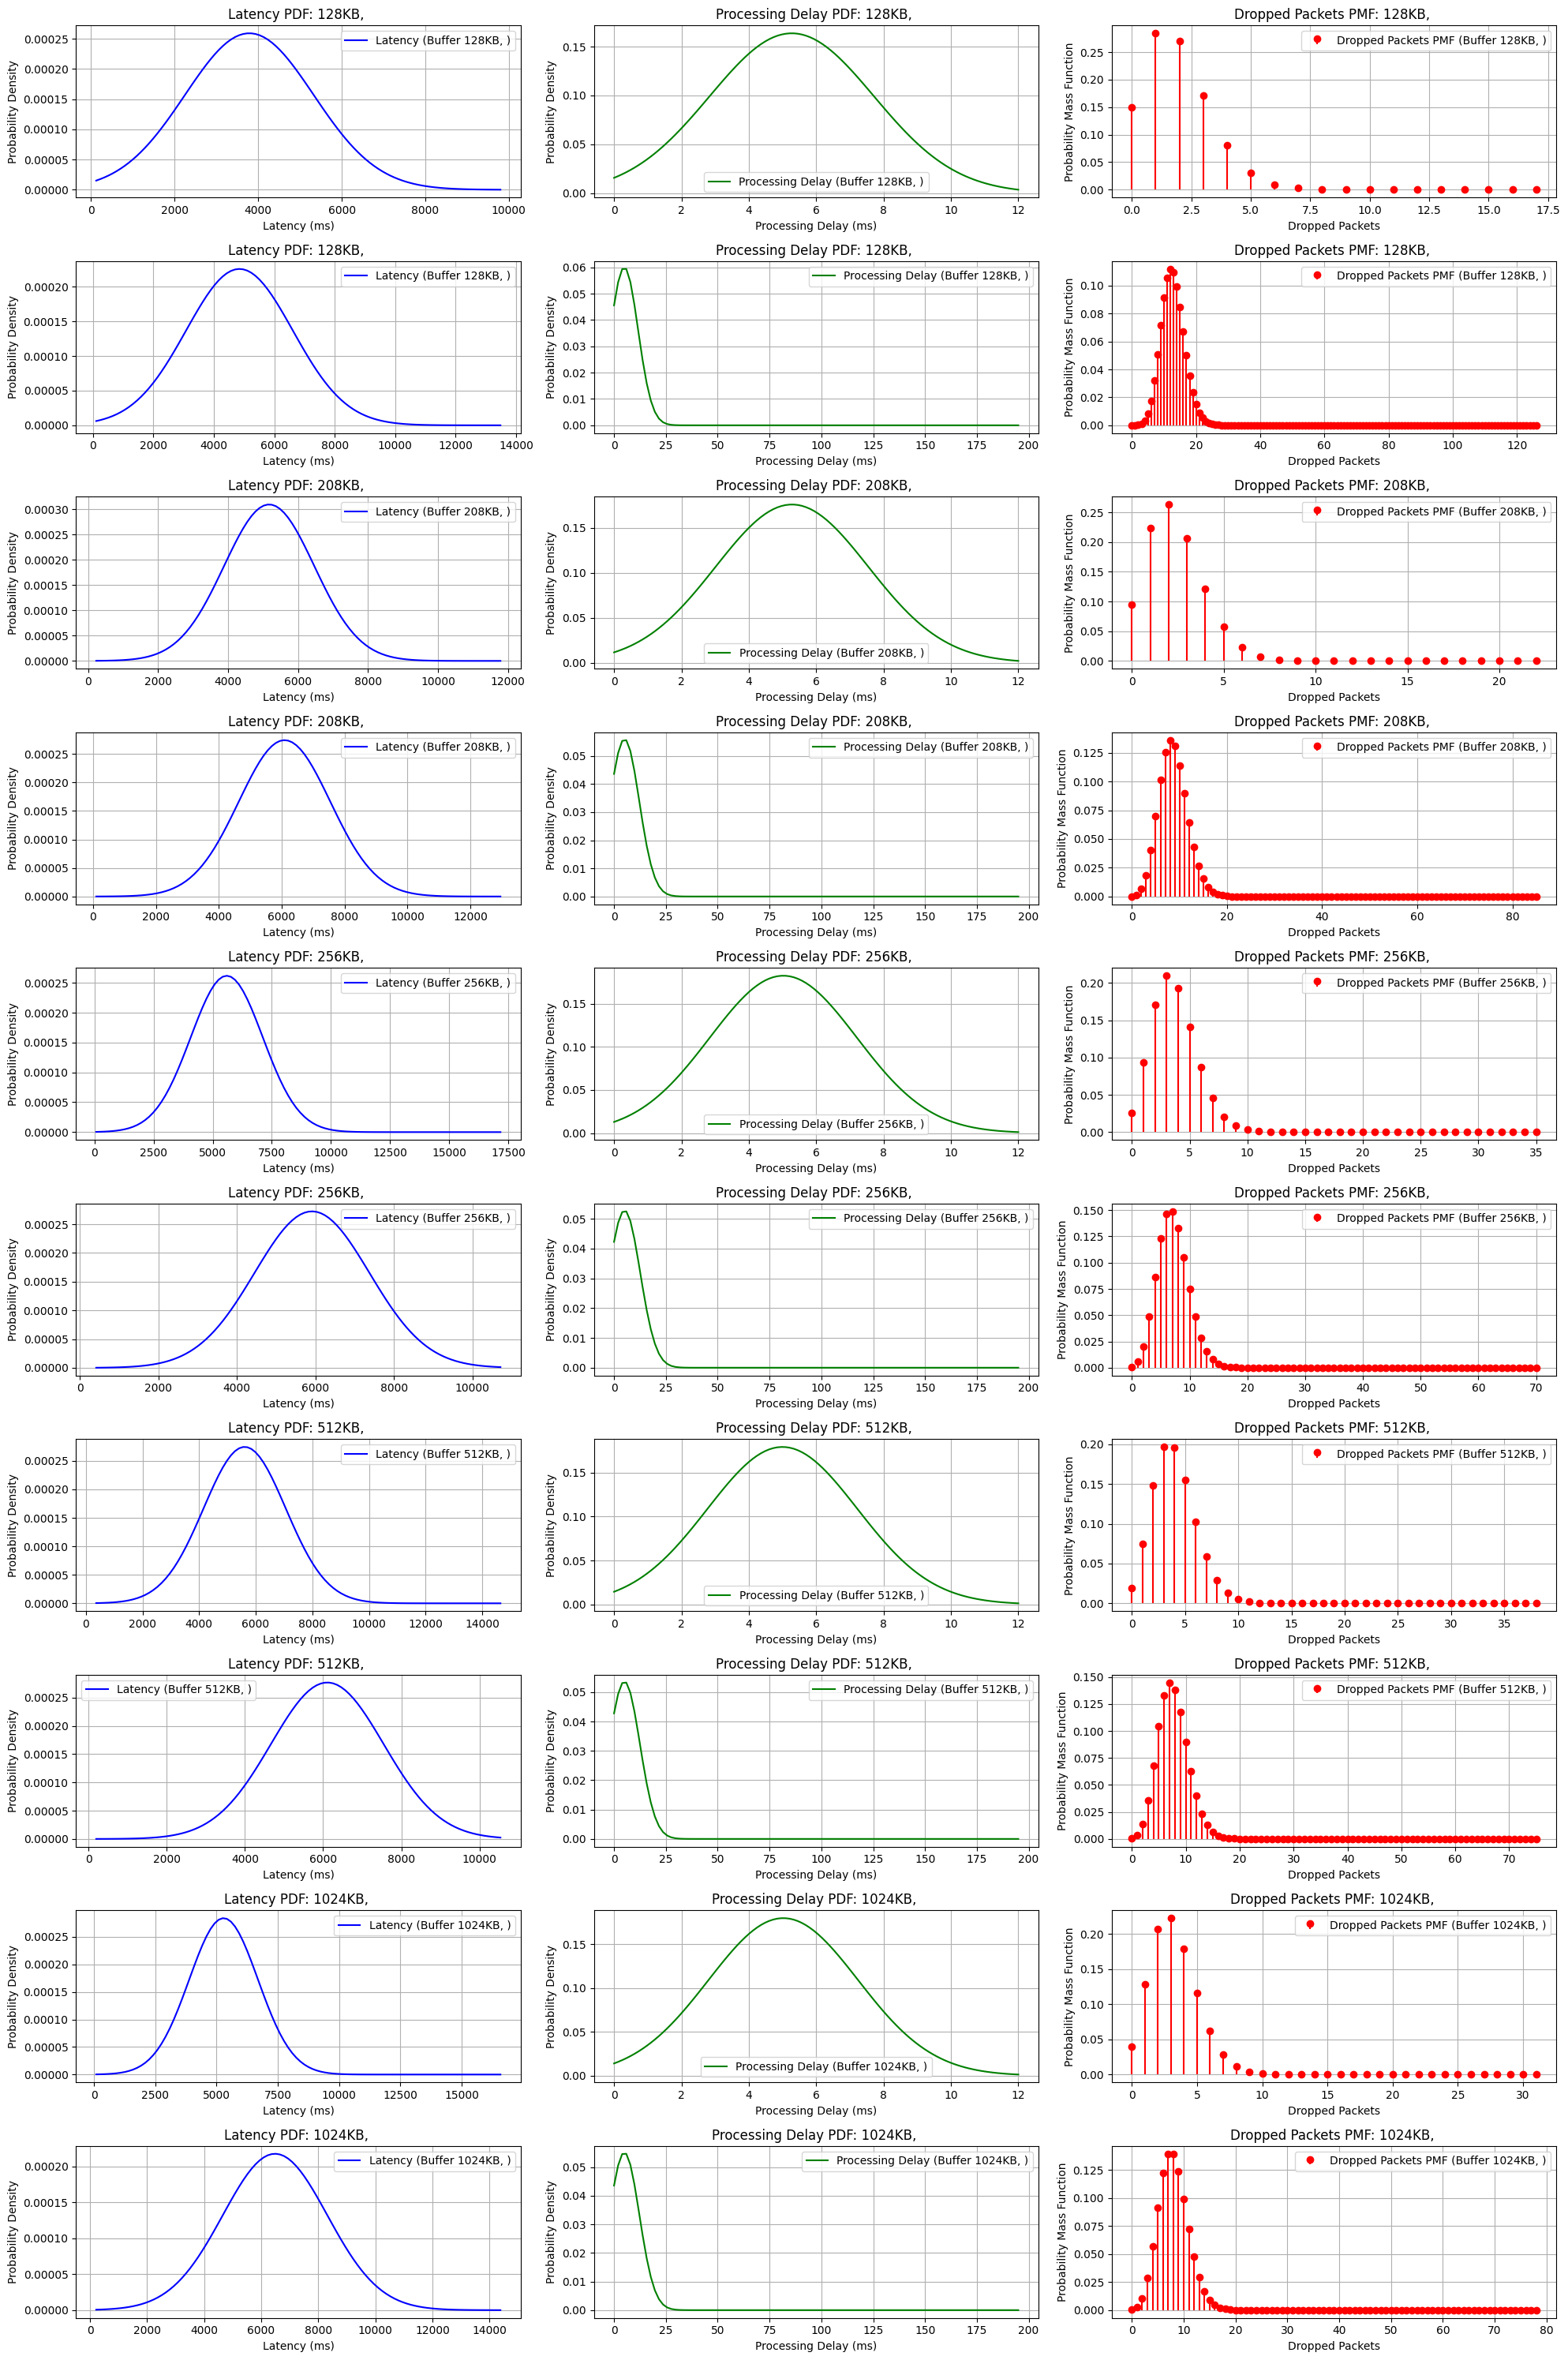

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# List of file names with full paths
file_names = [
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_128KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_208KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_256KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_512KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b1_1024KB.csv',
    '/content/drive/MyDrive/Cluster/Oct_29/PDF/0.002/packet_latency_log_b2_1024KB.csv'
]

# Plotting
plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots

plot_index = 1

# Iterate over the files
for file in file_names:
    # Load the dataset
    data = pd.read_csv(file)

    # Extract buffer size and bolt type (b1 or b2) from the file name
    buffer_size = int(file.split('_')[-1].replace('KB.csv', ''))
    bolt_type = file.split('_')[3].replace('log', '')

    # Filter data for the current buffer size and bolt type
    filtered_data = data[data['Buffer Size(KB)'] == buffer_size]

    # Fit the distributions for continuous variables (Latency and Processing Delay)
    latency_params = stats.norm.fit(filtered_data['Latency (ms)'])
    delay_params = stats.norm.fit(filtered_data['Processing Delay (ms)'])

    # For Dropped Packets, calculate the mean and use it for Poisson distribution (Discrete)
    lambda_drop = np.mean(filtered_data['Dropped Packets'])

    # Generate a range for PDFs for Latency and Processing Delay (Continuous Distributions)
    latency_range = np.linspace(filtered_data['Latency (ms)'].min(), filtered_data['Latency (ms)'].max(), 100)
    delay_range = np.linspace(filtered_data['Processing Delay (ms)'].min(), filtered_data['Processing Delay (ms)'].max(), 100)

    # Calculate the PDF for Latency and Processing Delay
    latency_pdf = stats.norm.pdf(latency_range, *latency_params)
    delay_pdf = stats.norm.pdf(delay_range, *delay_params)

    # Generate a range for PMF of Dropped Packets
    drop_range = np.arange(0, int(lambda_drop * 10))  # Adjust based on observed max values
    drop_pmf = stats.poisson.pmf(drop_range, lambda_drop)

    # Plotting for each file (Buffer size and Bolt type)
    # Latency PDF
    plt.subplot(10, 3, plot_index)
    plt.plot(latency_range, latency_pdf, label=f"Latency (Buffer {buffer_size}KB, {bolt_type})", color="blue")
    plt.title(f"Latency PDF: {buffer_size}KB, {bolt_type}")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    # Processing Delay PDF
    plt.subplot(10, 3, plot_index + 1)
    plt.plot(delay_range, delay_pdf, label=f"Processing Delay (Buffer {buffer_size}KB, {bolt_type})", color="green")
    plt.title(f"Processing Delay PDF: {buffer_size}KB, {bolt_type}")
    plt.xlabel("Processing Delay (ms)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    # Dropped Packets PMF
    plt.subplot(10, 3, plot_index + 2)
    plt.stem(drop_range, drop_pmf, label=f"Dropped Packets PMF (Buffer {buffer_size}KB, {bolt_type})", linefmt="red", markerfmt="ro", basefmt=" ")
    plt.title(f"Dropped Packets PMF: {buffer_size}KB, {bolt_type}")
    plt.xlabel("Dropped Packets")
    plt.ylabel("Probability Mass Function")
    plt.legend()
    plt.grid(True)

    plot_index += 3  # Adjust plot index to go to the next set of subplots

plt.tight_layout()
plt.show()


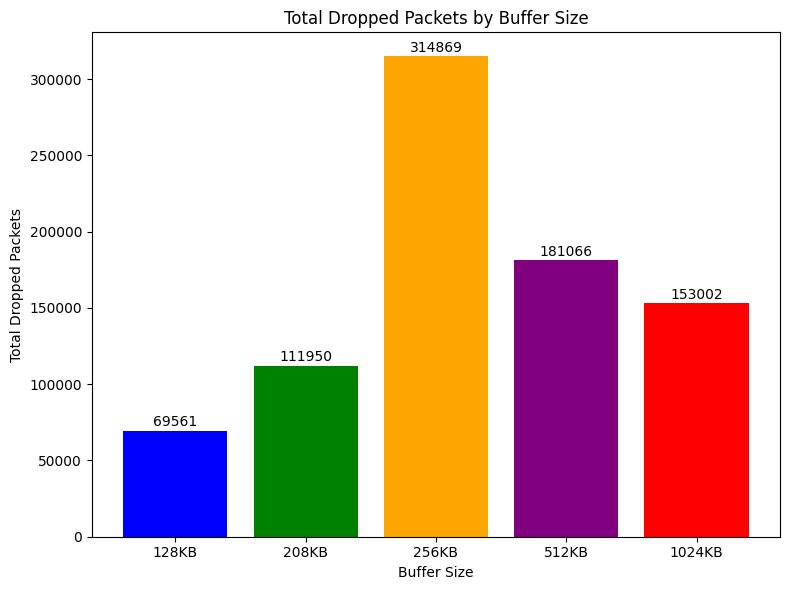

In [ ]:
import matplotlib.pyplot as plt

# Data for total dropped packets across different buffer sizes
buffer_sizes = ['128KB', '208KB', '256KB', '512KB', '1024KB']
dropped_packets = [69561, 111950, 314869, 181066, 153002]  # Example values

# Color mapping for the bars
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(buffer_sizes, dropped_packets, color=colors)

# Add labels and title
plt.ylabel('Total Dropped Packets')
plt.xlabel('Buffer Size')
plt.title('Total Dropped Packets by Buffer Size')

# Display values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


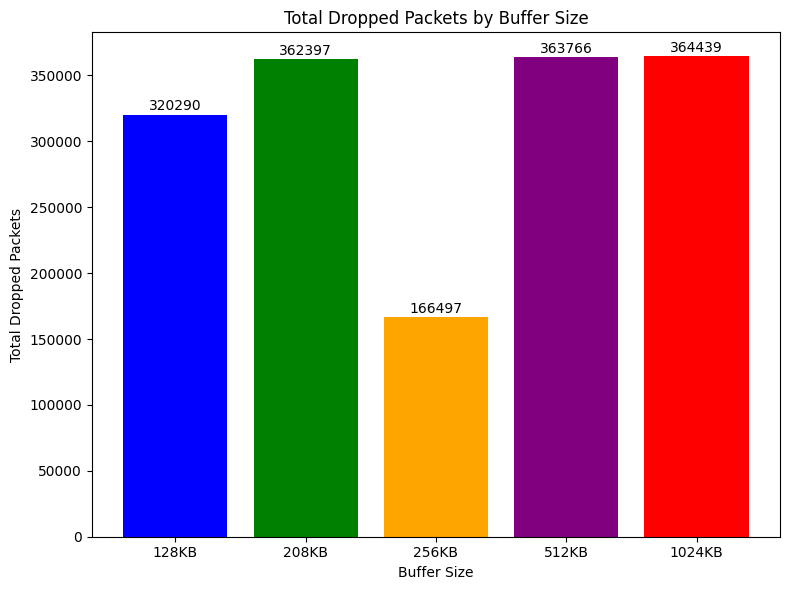

In [ ]:
import matplotlib.pyplot as plt

# Data for total dropped packets across different buffer sizes
buffer_sizes = ['128KB', '208KB', '256KB', '512KB', '1024KB']
dropped_packets = [320290, 362397, 166497, 363766, 364439]  # Example values

# Color mapping for the bars
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(buffer_sizes, dropped_packets, color=colors)

# Add labels and title
plt.ylabel('Total Dropped Packets')
plt.xlabel('Buffer Size')
plt.title('Total Dropped Packets by Buffer Size')

# Display values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
